<a href="https://colab.research.google.com/github/Nagakaburos/Previs-o_de_A-es_da_Tata_Global_com_KNN.ipynb/blob/main/Previs%C3%A3o_de_A%C3%A7%C3%B5es_da_Tata_Global_com_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install quandl
import quandl


In [ ]:
data = pd.read_csv('NSE-TATAGLOBAL11.csv')

In [ ]:
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
6,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
7,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
8,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
9,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55


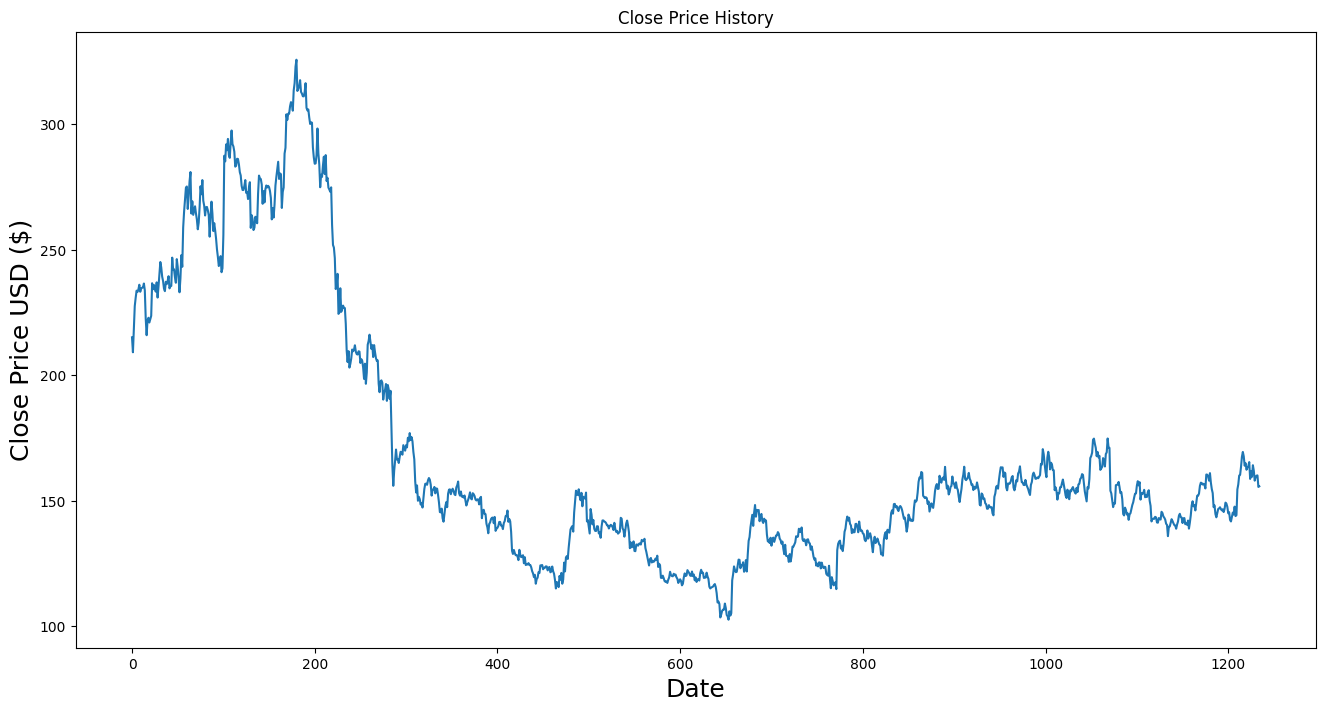

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data['open - close'] = data['Open'] - data['Close']
data['high - low'] = data['High'] - data['Low']
data = data.dropna()

In [ ]:
X = data[['open - close', 'high - low']]
#y = data['Close']
X.head()

,open - close,high - low
0,-7.15,15.40
1,7.80,12.70
2,5.30,11.65
3,2.40,11.75
4,3.65,13.55


In [ ]:
Y= np.where(data['Close'].shift(-1) > data['Close'], 1, -1)

In [ ]:
Y

array([-1,  1,  1, ..., -1,  1, -1])

In [ ]:
from  sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 44)

In [ ]:
# from sklearn.linear_model import kNeighborsClassifier # kNeighborsClassifier is not in sklearn.linear_model
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier from sklearn.neighbors instead
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

model.fit(x_train, y_train) # Changed X_train, Y_train to x_train, y_train to match variable names defined earlier

accuracy_train = accuracy_score(y_train, model.predict(x_train)) # Changed Y_train to y_train to match variable names
accuracy_test = accuracy_score(y_test, model.predict(x_test)) # Changed Y_test to y_test to match variable names

print ('train_data Accuracy: %.2f' %accuracy_train)
print ('test_data Accuracy: %.2f' %accuracy_test)

train_data Accuracy: 0.88
test_data Accuracy: 0.87


In [ ]:
predictions_classification = model.predict(x_test)

In [ ]:
actual_predicted_data = pd.DataFrame({'Actual Class': y_test, 'Predicted.Class': predictions_classification})

In [ ]:
actual_predicted_data.head(10)

,Actual Class,Predicted.Class
0,-1,-1
1,-1,-1
2,-1,-1
3,1,1
4,1,1
5,-1,-1
6,1,1
7,-1,-1
8,1,1
9,-1,1


In [ ]:
y = data['Close']

In [ ]:
y

,Close
0,215.15
1,209.20
2,218.20
3,227.60
4,230.90
...,...
1230,159.45
1231,160.05
1232,160.15
1233,155.55


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import  neighbors

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.25, random_state=44)

params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

model_reg.fit(x_train_reg, y_train_reg)
predictions = model_reg.predict(x_test_reg)

In [ ]:
print(predictions)

[194.13333333 195.22666667 241.17333333 160.50333333 132.12666667
 225.41333333 198.15333333 174.71333333 130.63       137.87333333
 190.37333333 136.34666667 153.69       137.92333333 238.05666667
 149.19333333 168.46333333 143.99333333 180.39       142.59333333
 169.21666667 167.02333333 184.94666667 149.61666667 150.27
 137.31333333 157.04       141.01666667 212.63666667 240.75
 139.23       151.44       155.12       155.51333333 142.98333333
 245.51333333 171.78       143.48666667 133.82333333 143.84
 146.15333333 138.24333333 154.83       189.26666667 141.07666667
 152.07666667 140.00333333 131.75       176.82666667 226.25666667
 154.15666667 214.65       136.79333333 187.22       141.21666667
 142.47       133.54333333 141.02333333 163.46666667 223.89
 156.58       144.06333333 139.39       140.         185.09666667
 207.2        153.53666667 194.35       137.12333333 147.11
 168.96666667 142.79666667 171.51666667 155.54333333 153.09
 152.66       192.56333333 190.78666667 170.45

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rms

np.float64(169.45565765330932)

In [ ]:
valid = pd.DataFrame({'Actual Close': y_test_reg, 'Predicted Close value': predictions})

In [ ]:
valid.head(10)

,Actual Close,Predicted Close value
1000,161.60,194.133333
715,132.50,195.226667
283,193.85,241.173333
410,143.90,160.503333
1188,145.15,132.126667
141,278.20,225.413333
230,226.35,198.153333
794,139.50,174.713333
481,139.40,130.630000
707,137.55,137.873333
